In [1]:
# Importar las librerias necesarias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el conjunto de puntos en memoria
dataset__route = "data/lines2.csv"
dataset_df = pd.read_csv(dataset__route)

# 5 primeros registros dataset
dataset_df.head(5)

,x,y,color
0,153.699456,94.381506,1
1,168.964194,103.066688,1
2,205.432316,303.114200,0
3,244.592738,69.336451,4
4,200.651645,248.183610,0


In [3]:
# Normalizo los valores de las variables x e y antes de representar el datase
scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.24962976, 0.1820737 ],
       [0.28147894, 0.20205624],
       [0.35756801, 0.66231801],
       ...,
       [0.74408417, 0.6651203 ],
       [0.23119907, 0.73669417],
       [0.93320159, 0.86473452]])

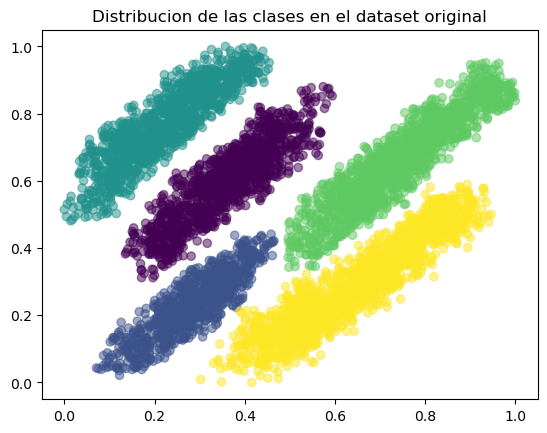

In [4]:
# Represento el conjunto de puntos en un eje bidimensional
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'], alpha = 0.5)
plt.title('Distribucion de las clases en el dataset original')
plt.show()

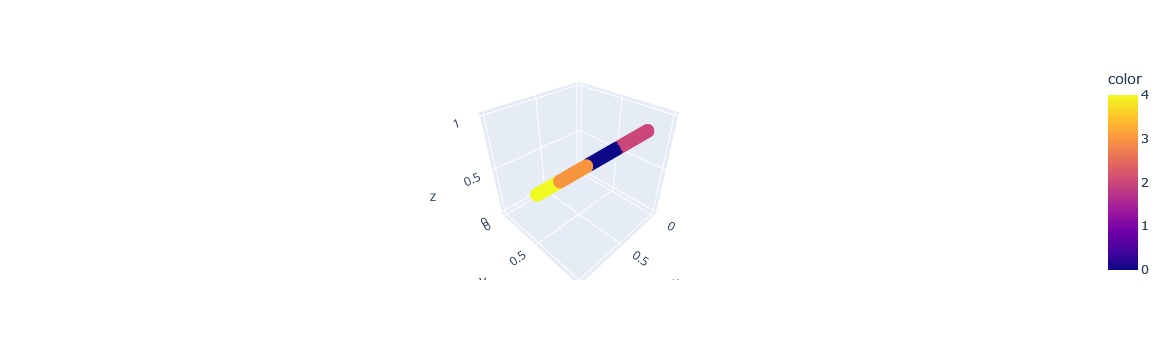

In [6]:
# Represento el conjunto de datos en un eje tridimensional
fig = px.scatter_3d(X, X[:, 0], X[:, 1], X[:, 1], color = dataset_df['color'])
fig.show()

In [79]:
## Instancio un objeto de la clase DBSCAN
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.025)

# Entreno el modelo
model.fit_predict(X)

array([0, 0, 1, ..., 2, 3, 2], dtype=int64)

In [80]:
# Defino una lista con las etiquetas que el modelo ha asigando a cada punto del dataset en el espacio de caracteristicas
labels = model.labels_

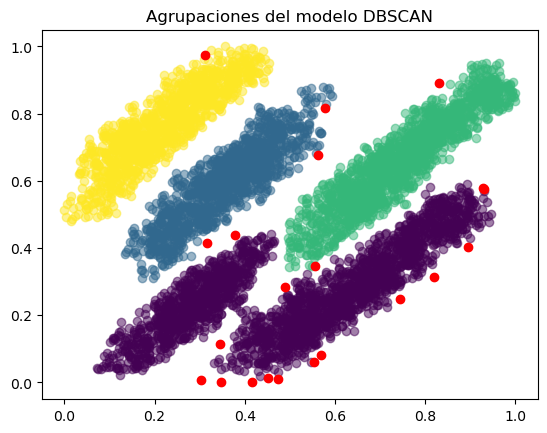

In [81]:
# Represento las agrupaciones del modelo DBSCAN en un eje bidimensional
plt.figure()

unique_labels = set([label for label in labels if label != -1])
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(unique_labels)))

for _ in range(len(set([label for label in labels if label != -1]))):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]], alpha = 0.5)
    
# Represento los puntos considerados anomalos por el modelo DBSCAN
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1], c = 'red')
plt.title("Agrupaciones del modelo DBSCAN")
plt.show()